In [5]:
!pip install --upgrade tensorflow

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.models import Model
import tensorflow.keras.layers as tfl
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.inception_v3 import InceptionV3

In [7]:
tf.__version__

'2.10.0'

In [8]:
DATA_DIR = "../input/coffeecherry/coffee-vs-cherry-plants/"
os.listdir(DATA_DIR)

['Cherry', 'Coffee-plant']

In [9]:
TRAIN_DATA_EL = DATA_DIR

In [10]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
directory = TRAIN_DATA_EL
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 61 files belonging to 2 classes.
Using 49 files for training.
Found 61 files belonging to 2 classes.
Using 12 files for validation.


2022-09-29 17:23:08.367078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-09-29 17:23:08.367254: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-29 17:23:08.367290: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b3699919427a): /proc/driver/nvidia/version does not exist
2022-09-29 17:23:08.370507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

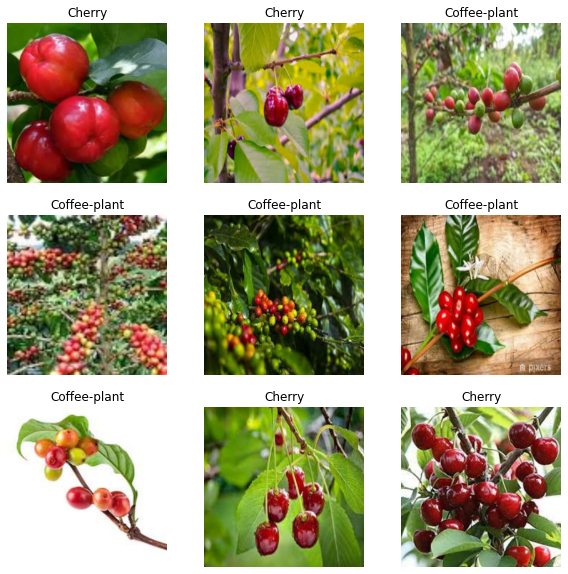

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Subtle difference between two plants
Coffee plants and cherries look insanely similar but there are very subtle differences like coffee plants tend to bunch together to stems and cherries kind of hang from little stems 

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [14]:
def coffee_cherry(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for binary classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
#     model = tf.keras.Sequential([
#       tfl.Rescaling(1./255, input_shape=(160, 160, 3)),
#       tfl.Conv2D(16, 3, padding='same', activation='relu'),
#       tfl.MaxPooling2D(),
#       tfl.Conv2D(32, 3, padding='same', activation='relu'),
#       tfl.MaxPooling2D(),
#       tfl.Conv2D(64, 3, padding='same', activation='relu'),
#       tfl.MaxPooling2D(),
#       tfl.Flatten(),
#       tfl.Dense(128, activation='relu'),
#       tfl.Dense(1)
# ])
#     return model
    inp = tfl.Input((256, 256, 3))
    mobile = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', input_tensor=inp, input_shape=(256, 256, 3), classifier_activation=None)
    mobile.trainable = False
    x = preprocess_input(inp)
    x = mobile.output
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.2)(x)
    out = tfl.Dense(1)(x)

    complete_model = Model(inp, out)
    return complete_model
    
    
    
#     input_shape = image_shape + (3)
    
#     base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
#     input_shape=input_shape,
#     include_top=False,
#     weights='imagenet',
#     input_tensor=inp,
#     classifier_activation=None 
#     )
    
#     base_model.trainable = False
#     inputs = tf.Input(input_shape)
    
#     #print(base_model.summary())
#     #X = data_augmentation(inputs)
    
#     X = preprocess_input(inputs)
#     X = base_model(X, training=False)
#     X = base_model.output
#     X = tfl.GlobalAveragePooling2D()(X)
#     X = tfl.Dropout(0.2)(X)
    
#     prediction_layer = tfl.Dense(1)
    
#     outputs = prediction_layer(X) 
#     model = tf.keras.Model(inputs, outputs)
#     return model

In [15]:
model = coffee_cherry(IMG_SIZE)

9406464/9406464 [==============================] - 0s 0us/step


In [16]:
base_learning_rate = 0.01
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics='accuracy')

In [17]:
initial_epochs = 30
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 0.9033 - accuracy: 0.5102 - val_loss: 1.6139 - val_accuracy: 0.4167
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 1.4533 - accuracy: 0.4898 - val_loss: 1.0329 - val_accuracy: 0.4167
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 1.0285 - accuracy: 0.5102 - val_loss: 0.6615 - val_accuracy: 0.5833
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.6449 - accuracy: 0.5918 - val_loss: 0.9651 - val_accuracy: 0.5833
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 1.0420 - accuracy: 0.5102 - val_loss: 0.9778 - val_accuracy: 0.5833
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.8316 - accuracy: 0.5306 - val_loss: 0.7431 - val_accuracy: 0.5833
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.6452 - accuracy: 0.5918 - val_loss: 0.5964 - val_accuracy: 0.6667
Epoch 8/30
1/1 [=========================

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                             

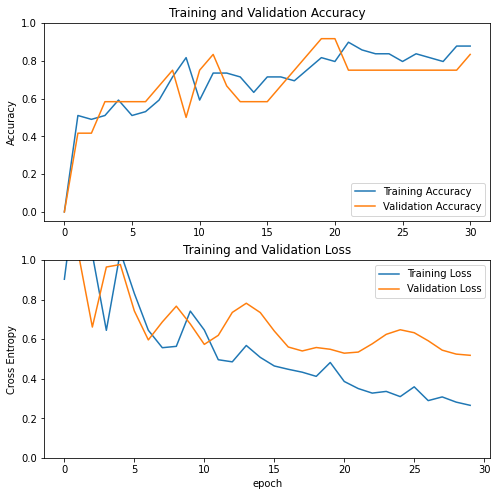

In [20]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
def predict(img_path):
    test_image = img_path
    # Loading the image and converting it to a numpy array for feeding it to the model. Its important to use expand_dims since our original model takes batches of images
    # as input, and here we are feeding a single image to it, so the number of dimensions should match for model input.
    img = tf.keras.utils.load_img(test_image, target_size=(256,256))
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    pred = model.predict(img_arr)
    score = tf.nn.softmax(pred[0])

    return "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))

predict("../input/coffeecherry/coffee-vs-cherry-plants/Coffee-plant/images13.jpg")

1/1 [==============================] - 1s 989ms/step


'This image most likely belongs to Cherry with a 100.00 percent confidence.'

In [24]:
# Taking the outputs of first 100 layers from trained model, leaving the first Input layer, in a list
layer_outputs = [layer.output for layer in model.layers[1:100]]

# This is image of a Rose flower from our dataset. All of the visualizations in this cell are of this image.
test_image = "../input/coffeecherry/coffee-vs-cherry-plants/Coffee-plant/images13.jpg"
# Loading the image and converting it to a numpy array for feeding it to the model. Its important to use expand_dims since our original model takes batches of images
# as input, and here we are feeding a single image to it, so the number of dimensions should match for model input.
img = tf.keras.utils.load_img(test_image, target_size=(256, 256))
img_arr = tf.keras.utils.img_to_array(img)
img_arr = tf.expand_dims(img_arr, 0) # Create a batch


# Defining a new model using original model's input and all the 100 layers outputs and then predicting the values for all those 100 layers for our test image.
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

# These are names of layers, the outputs of which we are going to visualize.
layer_names = ['conv2d_1', 'activation_1', 'conv2d_4', 'activation_4', 'conv2d_9', 'activation_9']
activ_list = [activations[0], activations[2], activations[10], activations[12], activations[17], activations[19]]

1/1 [==============================] - 1s 761ms/step


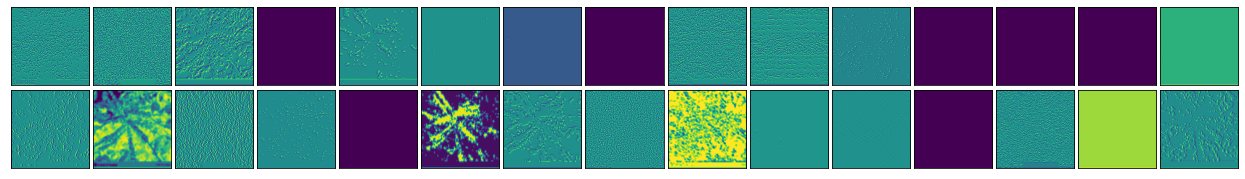

In [25]:
fig = plt.figure(figsize=(22, 3))
for img in range(30):
    ax = fig.add_subplot(2, 15, img+1)
    ax = plt.imshow(activations[4][0, :, :, img], cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)
#plt.savefig("output-mobile-net-.jpg")

Alas the model is grossly missclassifying and couldn't pick up on the differences. 